**Predicting Heart Disease Using Machinbe Learning**  
This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting heart disease based on their medical attributes.  We are going to take the following approach: 
1. problem Defination 
2. Data 
3. Evaluation 
4. Features 
5. Modelling 
6. Experiments  

## 1. Problem Defination 
in a statement,
> given clinical parameters about a patient. can we predict whether or not they have heart disease?

## 2. Data
The orignal data came from uci machine learning repository
There is a version available at kaggle also

## 3. Evaluation
> if we reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concepts.we'll persue the project.

## 4. Features
**create data dictionary**
age: age in years
sex: sex
1 = male
0 = female
cp: chest pain type
Value 0: typical angina
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: asymptomatic
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholestoral in mg/dl
fbs: (fasting blood sugar > 120 mg/dl)
1 = true;
0 = false
restecg: resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved
exang: exercise induced angina
1 = yes
0 = no
oldpeak = ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
Value 0: upsloping
Value 1: flat
Value 2: downsloping
ca: number of major vessels (0-3) colored by flourosopy
thal:
0 = error (in the original dataset 0 maps to NaN's)
1 = fixed defect
2 = normal
3 = reversable defect
target (the la
ble):
0 = no disease,
1 = diseaseble):
0 = no disease,
1 = disease

## Preparing Tools
we are going to use pandas numpy matplotlib for data analysis and manipulation

In [48]:
#importingall the tools we need

#Regular EDA(exploratory data analysis)or plotting libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#we want our plot to appear in this notebook
%matplotlib inline

#Models from scikitlearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay 

## Load Data

In [1]:
df = pd.read_csv("heart-disease.csv")
df

NameError: name 'pd' is not defined

## Data Exploration (exploratory data analysis EDA)
The goal here is to find out more about the data 

1.What questions are you trying to solve?
2.What kind of data we have and how we treat different types?
3.Whats missing from the data and how do you deal with it?
4.Where are outliers and why sholud you care about them?
5.How can you add change or remove features to get more out of your data?


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#lets find out of how many of each classes there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

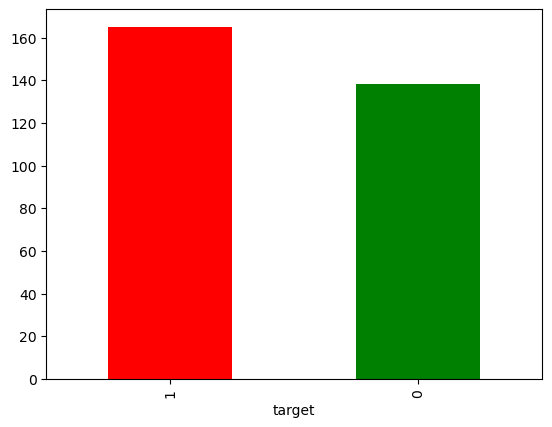

In [6]:
df["target"].value_counts().plot(kind="bar",color=["red","green"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#check the missing vlaues
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
#compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Text(0, 0.5, 'amount')

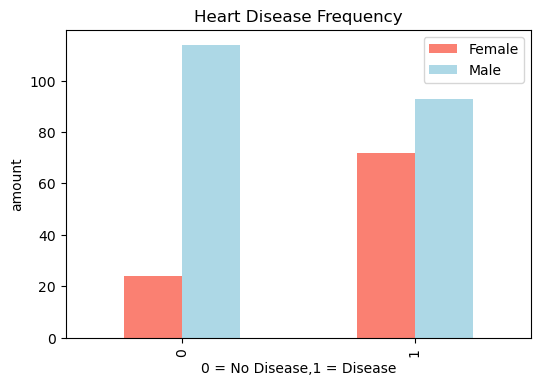

In [12]:
#create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(6,4),color=["salmon","lightblue"])
plt.title("Heart Disease Frequency")
plt.legend(["Female","Male"])
plt.xlabel("0 = No Disease,1 = Disease")
plt.ylabel("amount")

## Age vs Max Heart Rate for Heart Disease


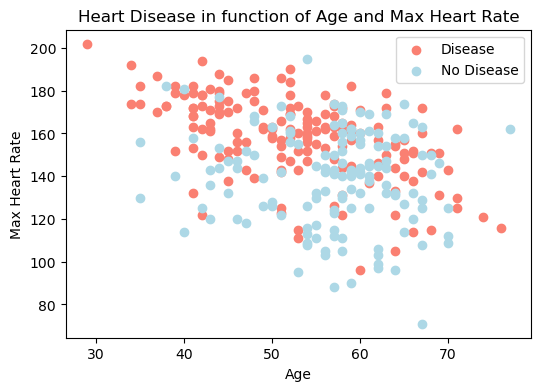

In [13]:
#create another figure
plt.figure(figsize=(6,4))

# scatter with positive example 
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")

#scatter with negative example
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

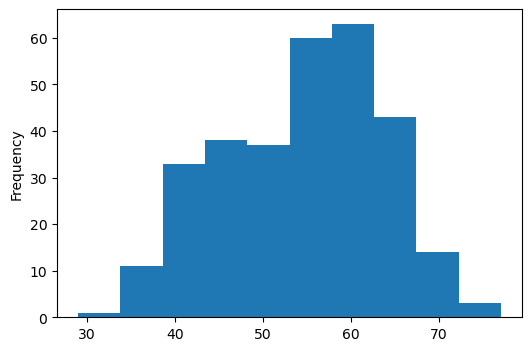

In [14]:
plt.figure(figsize=(6,4))
#check the distribution of the age column with histogtram
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Types
cp: chest pain type:
Value 0: typical angina 
Value 1: atypical angina 
Value 2: non-anginal pain 
Value 3: asymptomatic

In [15]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


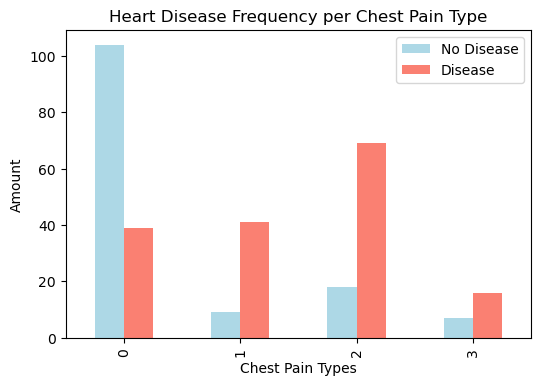

In [16]:
#Mae the crosstab more visual 
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(6,4),
                                 color=["lightblue","salmon"]);

#Add some communication
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Types")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


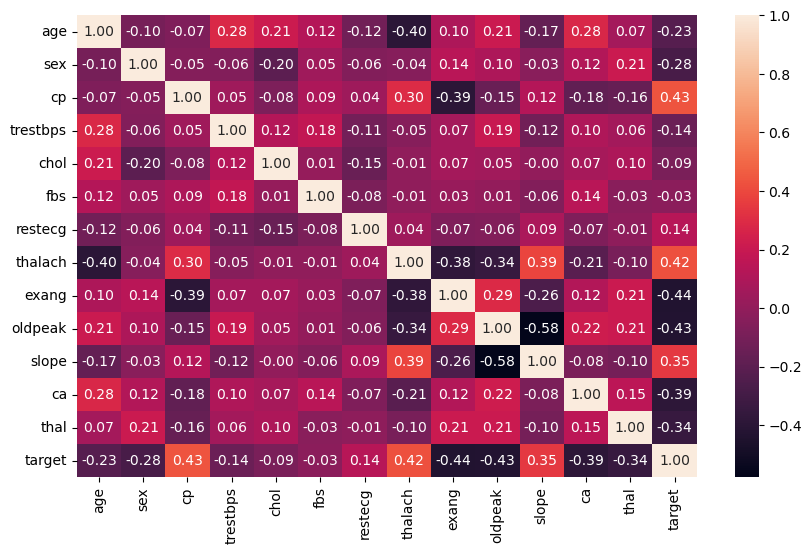

In [19]:
#lets make a correlation matrix more prettier
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(10,6))
ax=sns.heatmap(corr_matrix,annot=True,fmt=".2f")

## 5.Modeling

In [20]:
#split data into X and y
X = df.drop("target",axis=1)
y = df["target"]


In [21]:
#setup random seed
np.random.seed(42)

#split data into train and test splits
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [22]:
#put models in a dictionary
models = {"Logistic Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}

#Create a function to fit and score model 
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evalaute given machine learning models
    a dict of different scikit learn machine learning models
    
    """
    #set random seed
    np.random.seed(42)
    
    #make a dictionary to keep model scores
    model_scores = {}

    #loop through models
    for name , model in models.items():
        
        #fit the model to the data
        model.fit(x_train,y_train)
        
        #Evaluate the model and & append its scores to model_scores
        model_scores[name]=model.score(x_test,y_test)
        
    return model_scores


In [23]:
model_scores = fit_and_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\Lenovo\Desktop\ds-course\sample_project\heart-disease\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison

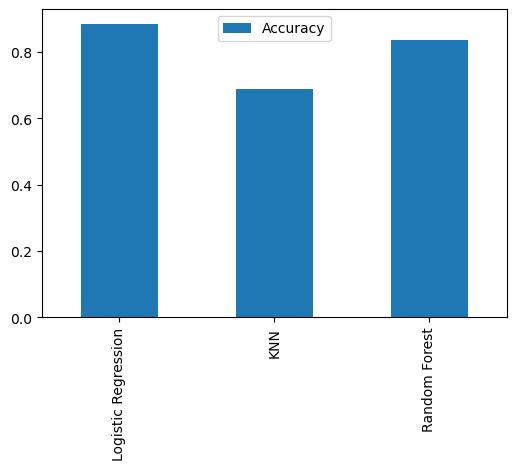

In [24]:
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot(kind="bar",figsize=(6,4));

#Now we have got baseline models & we know a models first prediction arenot always what we should based our next steps? what should we do 
* Hyperparameters Tuning 
* Features Importance
* Confusion matrix
* Cross-Validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area under the Curvea(AUC)

## Hyperparameter Tuning

In [25]:
#Lets Tune KNN
train_scores = []
test_scores = []

#create a list of different values for n_neighbors
neighbors = range(1,25)

#setup KNN instance
knn = KNeighborsClassifier()

#loop through different neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the model
    knn.fit(x_train,y_train)
    
    #update the training score list
    train_scores.append(knn.score(x_train,y_train))
    
    #update the test scores list
    test_scores.append(knn.score(x_test,y_test))


In [26]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058,
 0.6859504132231405,
 0.6694214876033058,
 0.7024793388429752,
 0.6735537190082644]

In [27]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361]

Max KNN score on the test data: 75.41%


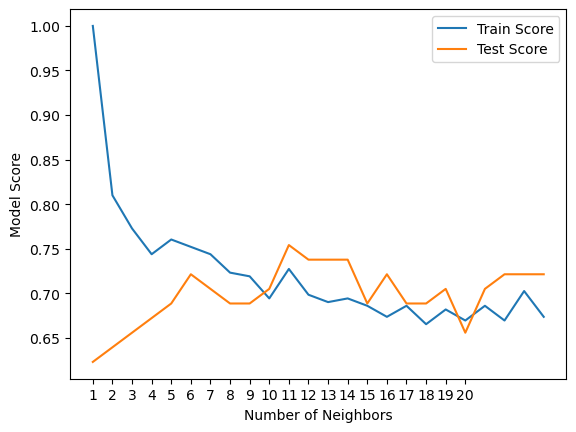

In [28]:
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label="Test Score")
plt.xticks(range(1,21,1));
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Max KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameters tunig with RandomizedSearchCV
we are going to tune:
* LogisticRegression()
* RandomForestClassifier()
* using RandomizedSearchCV

In [29]:
#Create a Hyperparameter Grid for logisiticRegression
log_grid = {"C": np.logspace(-4,4,20),
           "solver":["liblinear"]}

#create a hyperparameters grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}


In [30]:
#Tune logistic regression model
np.random.seed(42)

#setup randomized search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions = log_grid , cv=5,n_iter=20,verbose=True)

#fit randomSearch model for logistic regression
rs_log_reg.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [31]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
#setup random seed
np.random.seed(42)

#setup randomizedsearch for RandomForestClassifier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions =rf_grid,cv=5,n_iter=50,verbose=True)

#fit randomSearch model for RandomForestclassifier()
rs_rf.fit(x_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [34]:
#find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [35]:
#Evaluate RandomizedSearch RandomForestClassifer model
rs_rf.score(x_test,y_test)

0.8688524590163934

In [36]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameter Tuning with GridSearchCV

In [37]:
#setup random seed
np.random.seed(42)

#setup grid Search for Logisticregression()
gs_log_reg = GridSearchCV(LogisticRegression(),param_grid = log_grid,verbose=True)

#fit the gridsearch model for logisticRegression()
gs_log_reg.fit(x_train,y_train)

#Evaluate GridSearch LogsiticRegression model 
gs_log_reg.score(x_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8852459016393442

## Evaluating our Tuned Machine learning Classifier,beyond Accuracy
* Roc Curve & AUC Score
* Confusion matrix
* Classification Report
* precision
* Recall
* F1-Score

and it would be great if cross-validation was used where possible
To make comparisons and evaluate our trained model,first we need to make predictions.


In [38]:
#make predictions with tuned GridSearch LogisticRegression model
y_preds=gs_log_reg.predict(x_test)


In [39]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [40]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

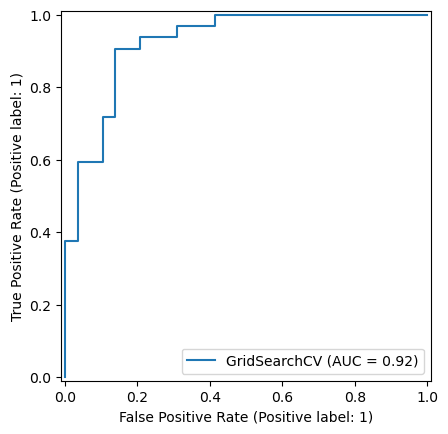

In [41]:
#plot ROC Curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg,x_test,y_test);

In [42]:
#Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


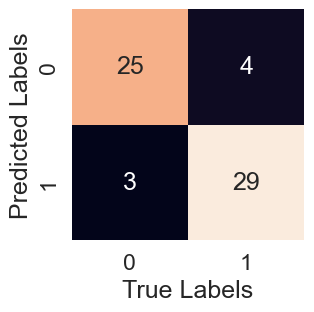

In [43]:
sns.set(font_scale=1.5)

def plot_confusion_matrix(y_test,y_preds):
    """
    plot a nice looking confusion matrix using seaborn heatmap
    """
    fig,ax= plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Labels")
    plt.ylabel("Predicted Labels")

plot_confusion_matrix(y_test,y_preds)

In [44]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate Evaluation metrics using cross-validation

In [45]:
#Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [46]:
#create a new classifer with best hyperpaprameters
clf = LogisticRegression(C=0.23357214690901212,solver="liblinear")

In [54]:
#Cross Validated Accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc=cv_acc.mean()
cv_acc

0.8479781420765027

In [58]:
#Cross Validated Precision
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision=cv_precision.mean()
cv_precision

0.8215873015873015

In [59]:
#Cross Validated Recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall=cv_recall.mean()
cv_recall

0.9272727272727274

In [62]:
#Cross Validated F1-Score
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1=cv_f1.mean()
cv_f1

0.8705403543192143

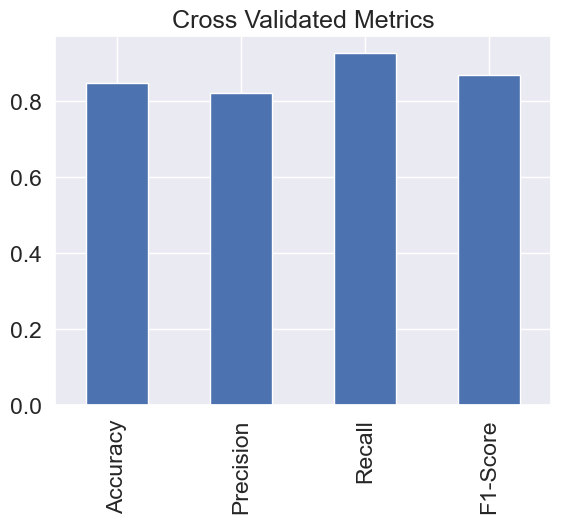

In [69]:
#Visualize Cross Validated Evaluations Metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,"Precision":cv_precision,"Recall":cv_recall,"F1-Score":cv_f1},index=[0])
cv_metrics.T.plot(kind="bar",title="Cross Validated Metrics",legend=False);


## Feature importance 
which feature contribute most to the outcomes of model and how did they contribute?

In [72]:
#fit an instance of LogisticREgression
clf = LogisticRegression(C=0.23357214690901212,solver="liblinear")
clf.fit(x_train,y_train)


LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [73]:
#check coef_
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

In [74]:
#make coef of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

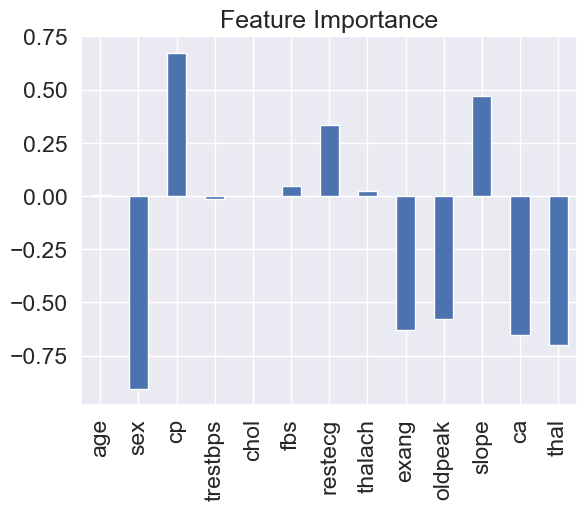

In [79]:
#Visualize Feature Importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False,figsize=(3,3));

In [80]:
pd.crosstab(df["slope"],df["target"])


target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## Experimentation
if you have not hit your evaluation metrics
* colud you collect more data?
* could you try a better model? like CatBoost or XGBoost
* could you improve current model
* if you hit your evaluation metrics how would you export and share model with others?
